In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nufit
from scipy.interpolate import CubicSpline

In [2]:
nufit.make_LambdaCDM_Pk("LambdaCDM")

In [3]:
nufit.v_masses_std(0.1, True, "100meV")

In [4]:
nu = np.load("100meV.npz", allow_pickle=True)
LCDM = np.load("LambdaCDM.npz", allow_pickle=True)

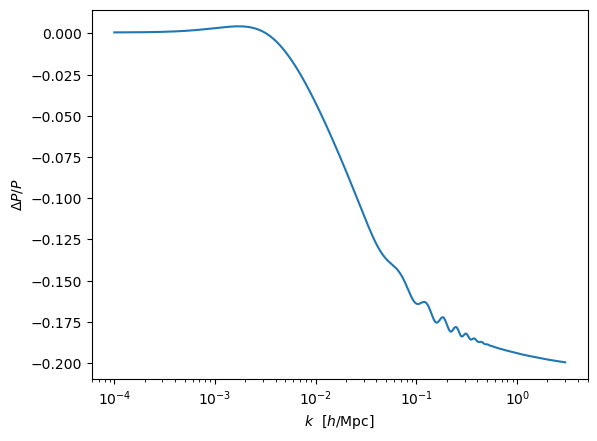

CPU times: user 30.2 s, sys: 255 ms, total: 30.4 s
Wall time: 5.23 s


In [5]:
%%time
nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.040.npz", "test", make_plot=True, sum_mnu_filename=True)
model = np.load("test312.npz", allow_pickle = True)

In [6]:
masses = np.linspace(0.05, 0.45, 20)

def mps_diff_ster(mass_val, input_file):
    name = f"small_mnu:{mass_val}"
    nufit.v_masses_sterile(mass_val, True, input_file, name)
    nu_out = np.load(f"{name}.npz", allow_pickle=True)
    
    return nu_out

def mps_diff_std(mass_val, plot):
    name = f"{mass_val}meV"
    nufit.v_masses_std(mass_val, True, name)
    nu_mass_val = np.load(f"{name}.npz", allow_pickle=True)

    if plot == True:
        plt.figure()
        plt.semilogx(nu_mass_val['k_n_array'], (nu_mass_val['Pk_n_array']-LCDM['Pk_LambdaCDM'])/LCDM['Pk_LambdaCDM'])
        plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
        plt.ylabel(r'$\Delta P / P$')
        plt.title(f"Matter Power Spectrum Differences of Lambda-CDM with $M_ν$ = {mass_val*1000} meV and $M_ν$ = 0")

    return nu_mass_val

In [7]:
mass_ster = np.zeros(len(masses))
deltap_ster = np.zeros(len(masses))
input_file = "RMFK_Results/mass-300-life-0.040.npz"

for i in range(len(masses)):
    val = masses[i]
    file = mps_diff_ster(val, input_file)

    mass_ster[i] = file['sum_nu']
    deltap_ster[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

Running CLASS version v3.3.0
Computing background
 -> age = 13.770598 Gyr
 -> conformal age = 14151.897990 Mpc
 -> N_eff = 3.044 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3405.751108
    corresponding to conformal time = 112.722902 Mpc
Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 1.000000e-01 eV (so m_i / omega_i =9.314161e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=2 has m_i = 1.003693e-01 eV (so m_i / omega_i =9.314162e+01 eV)
 -> ncdm species i=2 sampled with 11 (resp. 5) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 1.0132
 -> non-cold dark matter species with i=3 has m_i = 1.116154e-01 eV (so m_i / omega_i =9.314194e+01 eV)

In [8]:
mass_std = np.zeros(len(masses))
deltap_std = np.zeros(len(masses))

for i in range(len(masses)):
    mass_val = masses[i]
    std_file = mps_diff_std(mass_val, False)
    
    mass_std[i] = std_file['sum_nu']
    deltap_std[i] = ((std_file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

01 eV (so m_i / omega_i =9.704460e+01 eV)
 -> ncdm species i=3 sampled with 11 (resp. 6) points for purpose of background (resp. perturbation) integration. In the relativistic limit it gives Delta N_eff = 0.985388
 -> age = 13.772725 Gyr
 -> conformal age = 14174.263531 Mpc
 -> N_eff = 2.95616 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3314.936773
    corresponding to conformal time = 116.697613 Mpc
Running CLASS version v3.3.0
Computing background
 -> age = 13.770662 Gyr
 -> conformal age = 14153.469490 Mpc
 -> N_eff = 2.95616 (summed over all species that are non-relativistic at early times) 
 -> radiation/matter equality at z = 3446.412035
    corresponding to conformal time = 112.056168 Mpc
Running CLASS version v3.3.0
Computing background
 -> non-cold dark matter species with i=1 has m_i = 2.605263e-01 eV (so m_i / omega_i =9.704464e+01 eV)
 -> ncdm species i=1 sampled with 11 (resp. 6) points for purpose of background 

In [9]:
def cubic_spline(x, y, plot):
    f = CubicSpline(x, y, bc_type='natural')
    x_new = np.linspace(x[0], x[-1], 100)
    y_new = f(x_new)

    if plot == True:
        plt.plot(x_new, y_new, 'black')
        plt.plot(x, y, 'bo')
        plt.xlabel('Standard $M_ν$')
        plt.ylabel('Sterile $M_ν$')
        plt.show()
    
    return f 

In [10]:
std_fun = cubic_spline(np.flip(deltap_std), np.flip(mass_std), False)

In [11]:
stdm_from_sterp = np.zeros(len(deltap_ster))

for i in range(len(deltap_ster)):
    stdm_from_sterp[i] = std_fun(deltap_ster[i])

Text(0, 0.5, '$M_ν$')

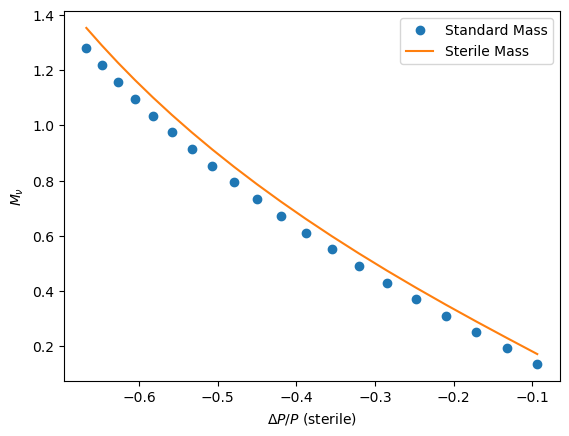

In [12]:
plt.figure()
plt.plot(deltap_ster, stdm_from_sterp, 'o', label = 'Standard Mass')
plt.plot(deltap_ster, mass_ster, label = 'Sterile Mass')
plt.legend()
plt.xlabel(r'$\Delta P / P$ (sterile)')
plt.ylabel('$M_ν$')

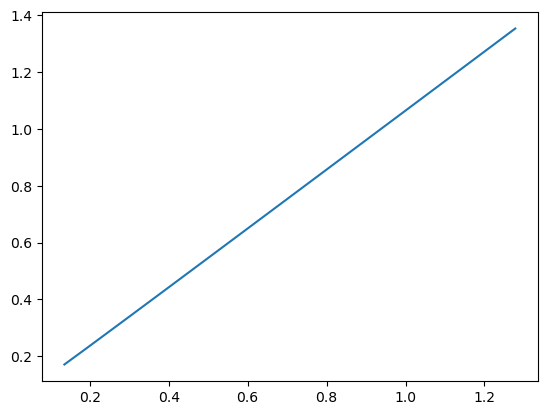

In [13]:
plt.figure()
plt.plot(stdm_from_sterp, mass_ster)

In [14]:
%%time
#nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.221.npz", "test", make_plot=True, sum_mnu_filename=True)

CPU times: user 1e+03 ns, sys: 1 μs, total: 2 μs
Wall time: 3.1 μs


In [ ]:
mass_ster2 = np.zeros(len(masses))
deltap_ster2 = np.zeros(len(masses))
input_file2 = "RMFK_Results/mass-300-life-0.221.npz"

for i in range(len(masses)):
    val = masses[i]
    file = mps_diff_ster(val, input_file2)

    mass_ster2[i] = file['sum_nu']
    deltap_ster2[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
stdm_from_sterp2 = np.zeros(len(deltap_ster2))

for i in range(len(deltap_ster2)):
    stdm_from_sterp2[i] = std_fun(deltap_ster2[i])

In [ ]:
plt.figure()
plt.plot(deltap_ster2, stdm_from_sterp2, 'o', label = 'Standard Mass')
plt.plot(deltap_ster2, mass_ster2, label = 'Sterile Mass')
plt.legend()
plt.title('Model with 0.221 lifetime')
plt.xlabel(r'$\Delta P / P$ (sterile)')
plt.ylabel('$M_ν$')

In [ ]:
plt.figure()
plt.plot(stdm_from_sterp2, mass_ster2)

In [ ]:
%%time
#nufit.v_masses_sterile(0.1, True, "RMFK_Results/mass-300-life-0.912.npz", "test", make_plot=True, sum_mnu_filename=True)

In [ ]:
mass_ster3 = np.zeros(len(masses))
deltap_ster3 = np.zeros(len(masses))
input_file3 = "RMFK_Results/mass-300-life-0.221.npz"

for i in range(len(masses)):
    val = masses[i]
    file = mps_diff_ster(val, input_file3)

    mass_ster3[i] = file['sum_nu']
    deltap_ster3[i] = ((file['Pk_n_array'][-1]-LCDM['Pk_LambdaCDM'][-1])/LCDM['Pk_LambdaCDM'][-1])

In [ ]:
stdm_from_sterp3 = np.zeros(len(deltap_ster3))

for i in range(len(deltap_ster3)):
    stdm_from_sterp2[i] = std_fun2(deltap_ster3[i])

In [ ]:
plt.figure()
plt.plot(deltap_ster3, stdm_from_sterp3, 'o', label = 'Standard Mass')
plt.plot(deltap_ster3, mass_ster3, label = 'Sterile Mass')
plt.legend()
plt.title('Model with 0.921 lifetime')
plt.xlabel(r'$\Delta P / P$ (sterile)')
plt.ylabel('$M_ν$')

In [ ]:
plt.figure()
plt.plot(stdm_from_sterp3, mass_ster3)